# Polynomiale Regression

Bisher waren die abhängigen Variablen $x_1, x_2, ..., x_2$ wie auch die Koeffizienten $\beta_1, \beta_2, ..., \beta_n$ stets linear, also mit dem Exponenten 1. Daher spricht man auch von der linearen Regression.

Bei der Linearen Regression wird davon ausgegangen, dass zwischen dem Prädiktor (X-Werte) und der Antwortvariablen Y ein linearer Zusammenhang besteht:

$\hat{Y} = \beta_0 + \beta_1 x + \beta_2x_2 + ... +\beta_nx_n$

Allerdings kann die Beziehung zwischen Y und den abhängigen Variablen auch nichtlinear sein. Wenden wir in diesem Fall ein lineares Modell wie oben gezeigt an, so dürfte unser Modell wohl kaum von hoher Qualität sein!

Wir simulieren dies anhand folgender künstlich generierter Daten:


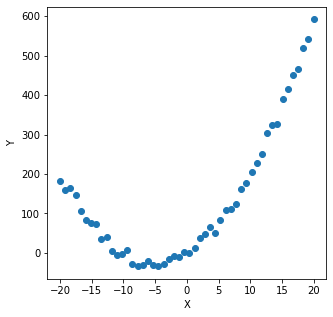

In [12]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-20, 20)
y = [x**2 + 10 * x + np.random.randint(-20,20) for x in X]

plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Die Visualisierung unserer Daten deutet also auf eine nichtlineare Beziehung zwischen dem Prädiktor x und der Antwortvariablen  Y hin. Eine Lineare Regression scheitert hier kläglich:

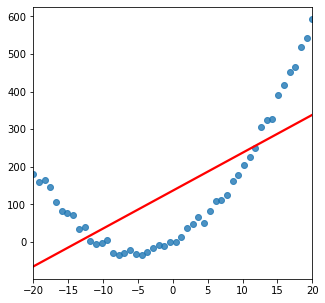

In [13]:
import seaborn as sn
sn.regplot(x=X,y=y, ci=False, line_kws={"color": "red"})
plt.show()

Vielmehr liegt die Vermutung nahe, dass eine Abhängigkeit, die durch ein Polynom ausgedrückt werden kann, besteht. Ein Polynom ist wie folgt definiert, wobei $n$ dem Grad des Polynoms entspricht:

$Y = \beta_0 + \beta_1x + \beta_2  x^2  + ... + \beta_n  x^n$

Können wir auch in so einem Fall eine Lineare Regression durchführen? Ja, können wir! Die Anwendung ist sogar recht einfach: Wir müssen die x-Werte, also die Daten der abhängigen Variablen, in einen Feature-Raum auf ein Polynom $n$-ten Grades erweitern.

Haben wir zum Beispiel zwei unahbängige Variablen $x_1$ und $x_2$ und es besteht ein quadratischer Zusammenhang (n=2), so erweitern wir den Feature-Raum mit allen Kombinationen der Features:

$\hat{Y} = \beta_0 + \beta_1x_1 + \beta_2x_2 +  \beta_3x_1x_2 + \beta_4x_1^2 + \beta_5x_2^2$

Es müssen also wieder alle $\beta_0, ... , \beta_n$ ermittelt werden, allerdings von den transformierten Daten. Warum sprechen wir dennoch von einer **Linearen** Regression, obwohl die x-Werte Exponenten einen Grad >=2 aufweisen? Der Begriff **Lineare Regression** bezieht sich auf die Koeffizienten $\beta_1, \beta_2, ..., \beta_n$, und die sind nach wie vor linear (Exponent=1). Die X-Werte werden dagegen in eine höhere Dimension transformiert und mit diesen transformierten Daten wird wie gewohnt eine Lineare Regression durchgeführt.

Die Transformation der Daten übernimmt hier die Methode *fit_transform* der Klasse *PolynomialFeatures* aus dem Package *sklearn.preprocessing*. Ein simples Beispiel:

| $$1$$ | $$x_0$$ | $$x_1$$ | $$x_0^2$$ | $$x_0x_1$$ | $$x_1^2$$ |
|:---|:---|:---|:---|:---|:---|
| 1 | 1 | 1 | 1 | 1 | 1 |
| 1 | 1 | 2 | 1 | 2 | 4 |
| 1 | 2 | 1 | 4 | 2 | 1 |
| 1 | 3 | 2 | 9 | 6 | 4 |

In [14]:
from sklearn.preprocessing import PolynomialFeatures

x_example = np.array([[1,1],[1,2], [2,1], [3,2]])
print("Daten:")
print(x_example)
pf = PolynomialFeatures(degree=2)
pf_transformed = pf.fit_transform(x_example)

print("Daten transformiert:")
print(pf.get_feature_names())
print(pf_transformed)

Daten:
[[1 1]
 [1 2]
 [2 1]
 [3 2]]
Daten transformiert:
['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 2. 1. 2. 4.]
 [1. 2. 1. 4. 2. 1.]
 [1. 3. 2. 9. 6. 4.]]


Wenden wir dies auf unseren ursprünglichen Datensatz an! Wir transformieren also die Daten und führen mit diesen eine Lineare Regression durch. Anschließend plotten wir die vom Modell prognostizierten Daten zusammen mit den ursprünglichen Daten und erkennen, dass das Modell sehr gut die realen Daten abbildet:

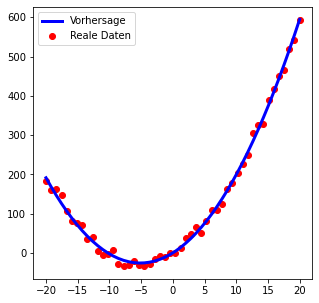

In [15]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

pf = PolynomialFeatures(degree=2, include_bias=False)
pf_transformed = pf.fit_transform(X.reshape(-1, 1))
df = pd.DataFrame(pf_transformed, columns=["x0", "x02"])
df["y"] = y


model = ols("y~x0+x02", data=df).fit()

pred = model.predict(df.iloc[:,:2])
plt.plot(X, pred, linewidth=3, color="blue", label="Vorhersage")
plt.scatter(X, y, color="red", label="Reale Daten")
plt.legend()
plt.show()


Mit einem Polynom höheren Grades, also zum Beispiel n=3, können wir auch komplexere Modelle erstellen. Allerdings darf man es dabei nicht übertreiben, sonst laufen wir ins **Overfitting**! Folgendes Beispiel generiert einen Beispieldatensatz auf Basis eines Polynoms 3. Grades. 

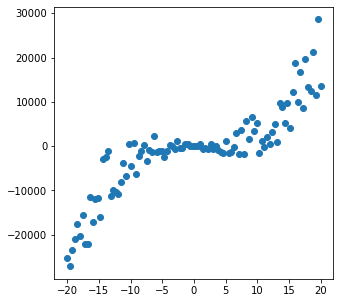

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)
size=100
x = np.linspace(-20, 20, size)
df = pd.DataFrame({"X": x,
                   "y": [3*x**3 - x**2-1.5*x + x*np.random.uniform(-500,500) for x in x]})


plt.scatter(df.X, df.y)
plt.show()

Welcher Grad n bietet sich hier an? Es ändert sich 3 Mal die Steigung innerhalb des geplotteten Wertebereiches, also versuchen wir es mit einem Polynom 3. Grades:

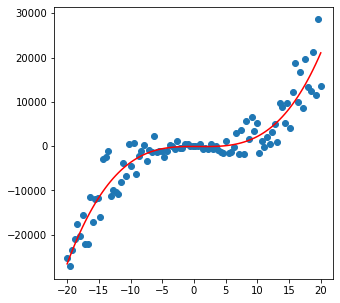

In [17]:
from sklearn.linear_model import LinearRegression
pf = PolynomialFeatures(degree=3)
pf_transformed = pf.fit_transform(df.X.values.reshape(-1,1))

model = LinearRegression().fit(pf_transformed, df.y.values)
pred = model.predict(pf_transformed)


plt.scatter(df.X, df.y)
plt.plot(df.X, pred, color="r")
plt.show()

Unser Modell bildet sehr gut unsere Daten ab! Was passiert, wenn wir den Grad des Polynoms erhöhen? Im folgenden Programm erstellen wir jeweils ein Modell für verschiedene Exponenten und wenden das Modell jeweils auf ein Test-Datenset an. Wir plotten jeweils die vorhergesagten Daten bezüglich der Trainingsdaten und sehen, dass sich das Modell immer besser an die realen Daten anpasst. Allerdings verallgemeinert unser Modell immer schlechter!

Wir sehen das in dem Diagramm, das die Fehler (Sum of Squared Errors, SSE), die bezüglich unserer Trainingsdaten gegenüber dem Fehler bezüglich unserer Testdaten gegenüberstellt: Die Fehler im Trainingsdatensatz werden natürlich immer kleiner, da sich das Modell immer besser an die Trainingsdaten anpasst. Bezüglich neuer Daten, also den Testdaten, werden die Fehler aber ab einem bestimmten n wieder größer!

Eine andere Kennzahl, die bei der Wahl des Polynom-Grades hilfreich sein kann, ist das **Bayes Information Criterion**, kurz **BIC**. In diese Kennzahl fließen die Stichprobengröße, der Grad des Polynoms sowie die SEE ein. BIC "bestraft" das Modell, wenn der Grad des Polynoms zunimmt. Das BIC berechnet sich wie folgt:

$BIC = N \cdot log(SSE) + n \cdot log(N)$

wobei hier N die Stichprobengröße und n der Grad des Polynoms ist. Wir ermitteln für jedes n das BIC für die Testdaten und stellen diese in einem weiteren Diagramm dar. Dort, wo das BIC das Minimum hat ist ein guter Kandidat für n.

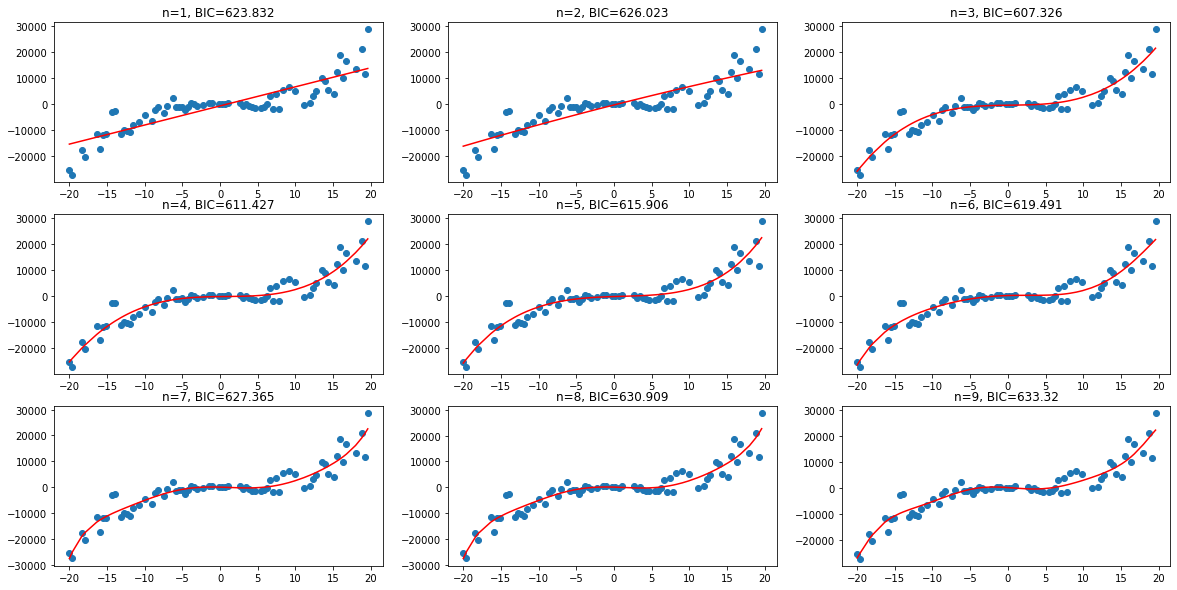

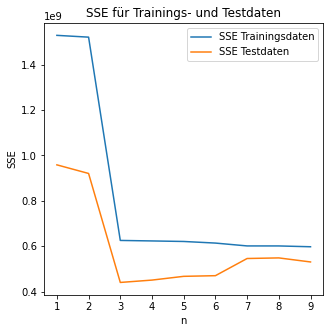

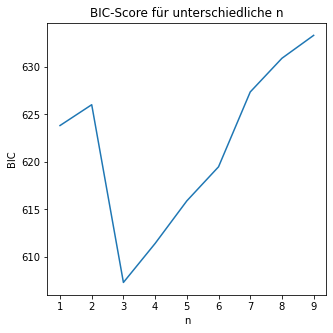

In [18]:
plt.rcParams["figure.figsize"] = (20, 10)
from sklearn.model_selection import train_test_split


def bic(sse, N, n):
    """Berechnet Bayessches Information Criteron. sse=Sum of Squared Errors,
    N=Stichprobenumfang, n = Exponent"""
    return N * np.log(sse) + n * np.log(N)

# Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(df.X, df.y, test_size=0.3, shuffle=True, random_state=0)
# Sortierte Testdaten für Plots
idx = np.argsort(X_train)

fig, axes = plt.subplots(3, 3)

bics = dict()
sses_train = []
sses_test = []

n = 1
for i in range(3):
    for j in range(3):
        pf = PolynomialFeatures(degree=n)
        pf_transformed_train = pf.fit_transform(X_train.values.reshape(-1,1))

        model = LinearRegression().fit(pf_transformed_train, y_train)
        pred_test = model.predict(pf.fit_transform(X_test.values.reshape(-1,1)))
        pred_train = model.predict(pf.fit_transform(X_train.values.reshape(-1,1)))
        sse_train = np.sum((pred_train-y_train)**2)
        sse_test = np.sum((pred_test-y_test)**2)
        sses_train.append(sse_train)
        sses_test.append(sse_test)
        bic_score = np.round(bic(sse_test, len(y_test), n) ,3)
        bics[n] = bic_score

        axes[i,j].scatter(X_train, y_train)
        axes[i,j].plot(X_train.iloc[idx], pred_train[idx], color="r")
        axes[i,j].set_title(f"n={n}, BIC={str(bic_score)}")
        n=n+1
plt.show()

plt.rcParams["figure.figsize"] = (5,5)

# Plotte SSE Train/Test


plt.plot(range(1, len(sses_train)+1), sses_train, label="SSE Trainingsdaten")
plt.plot(range(1, len(sses_test)+1), sses_test, label="SSE Testdaten")
plt.title("SSE für Trainings- und Testdaten")
plt.legend()
plt.xlabel("n")
plt.ylabel("SSE")
plt.show()


# Plotte BIC-Scores
plt.plot(bics.keys(), bics.values())
plt.title("BIC-Score für unterschiedliche n")
plt.xlabel("n")
plt.ylabel("BIC")
plt.show()